<a href="https://colab.research.google.com/github/navaneetha17-1/aiml-data-preprocessing/blob/main/AIML-Data%20Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn

In [2]:
import pandas as pd
data=pd.read_csv("/content/Titanic-Dataset.csv")
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [5]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [6]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [7]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [8]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

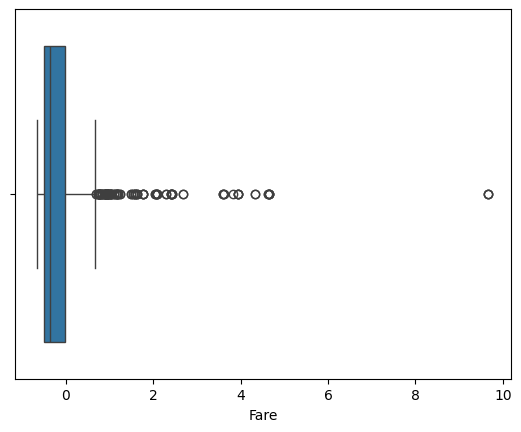

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data['Fare'])
plt.show()

In [11]:
data = data[data['Fare'] < data['Fare'].quantile(0.95)]

In [12]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  846 non-null    int64  
 1   Survived     846 non-null    int64  
 2   Pclass       846 non-null    int64  
 3   Name         846 non-null    object 
 4   Sex          846 non-null    int64  
 5   Age          846 non-null    float64
 6   SibSp        846 non-null    int64  
 7   Parch        846 non-null    int64  
 8   Ticket       846 non-null    object 
 9   Fare         846 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked_Q   846 non-null    bool   
 12  Embarked_S   846 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(3)
memory usage: 81.0+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            